In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data) 

In [4]:
m,n = data.shape 
np.random.shuffle(data)
dev_data = data[0:1000].T
train_data = data[1000:m].T

x_dev = dev_data[1:n]
y_dev = dev_data[0]
x_dev = x_dev/255.

x_train = train_data[1:n]
y_train = train_data[0]
x_train = x_train/255.

_, m_train = x_train.shape

In [5]:
def initialize_param(): 
    w1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5 
    w2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5 

    return w1,b1,w2,b2

def ReLu(z):
    return np.maximum(z,0)

def softmax(z):
    return np.exp(z)/sum(np.exp(z))

def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1,a1,z2,a2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derivative_relu(z):
    return z>0 

def back_prop(z1, a1, z2, a2, w1, w2, x, y):
    m = y.size
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * derivative_relu(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_param(w1,w2,b1,b2, dw1,dw2,db1,db2, alpha):
    w1 -= alpha*dw1
    w2 -= alpha*dw2
    b1 -= alpha*db1
    b2 -= alpha*db2
    return w1,w2,b1,b2

In [14]:
def get_pred(a):
    return np.argmax(a,0)

def get_acc(a,y):
    print(a,y)
    return np.sum(a==y)/y.size

def gradient_descent(x,y,iterations, alpha):
    w1,b1,w2,b2 = initialize_param()
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w1, w2, x, y)
        w1,w2,b1,b2 = update_param(w1,w2,b1,b2, dw1,dw2,db1,db2, alpha)
        if i%50 == 0 :
                print(f"Iteration: {i}")
                print("Accuracy: ", get_acc(get_pred(a2),y))
    return w1,b1,w2,b2

In [15]:
w1,b1,w2,b2 = gradient_descent(x_train, y_train, 500, 0.10)

Iteration: 0
[3 9 2 ... 2 9 2] [2 0 0 ... 0 6 2]
Accuracy:  0.10226829268292682
Iteration: 50
[2 0 2 ... 0 5 2] [2 0 0 ... 0 6 2]
Accuracy:  0.4758780487804878
Iteration: 100
[2 0 2 ... 6 8 2] [2 0 0 ... 0 6 2]
Accuracy:  0.6544146341463415
Iteration: 150
[2 0 2 ... 0 8 2] [2 0 0 ... 0 6 2]
Accuracy:  0.7352682926829268
Iteration: 200
[2 0 2 ... 0 6 2] [2 0 0 ... 0 6 2]
Accuracy:  0.7769512195121951
Iteration: 250
[2 0 2 ... 0 6 2] [2 0 0 ... 0 6 2]
Accuracy:  0.8044146341463415
Iteration: 300
[2 0 2 ... 0 6 2] [2 0 0 ... 0 6 2]
Accuracy:  0.8215121951219512
Iteration: 350
[2 0 2 ... 0 6 2] [2 0 0 ... 0 6 2]
Accuracy:  0.8338048780487805
Iteration: 400
[2 0 2 ... 0 6 2] [2 0 0 ... 0 6 2]
Accuracy:  0.843
Iteration: 450
[2 0 2 ... 0 6 2] [2 0 0 ... 0 6 2]
Accuracy:  0.8500243902439024


In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_pred(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


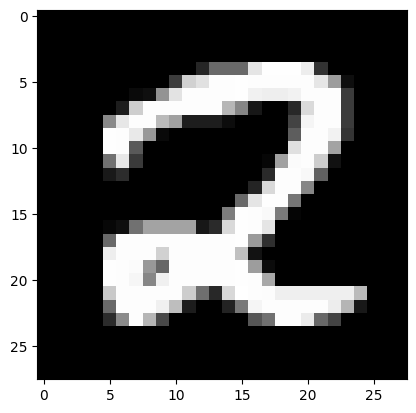

Prediction:  [0]
Label:  0


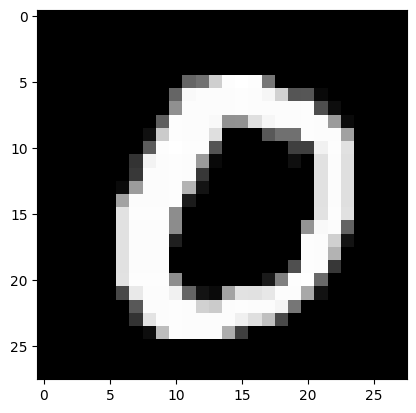

Prediction:  [0]
Label:  0


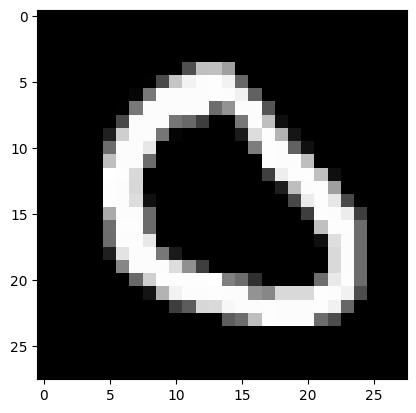

Prediction:  [8]
Label:  8


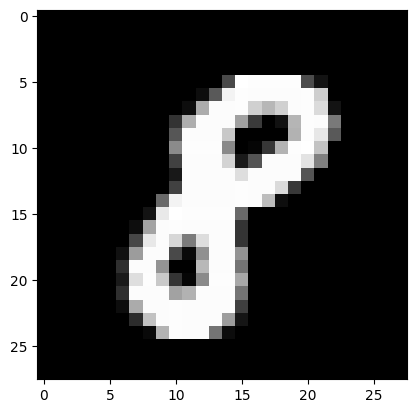

In [17]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [19]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2)
get_acc(dev_predictions, y_dev)

[6 9 4 3 2 7 5 0 5 6 3 0 9 6 3 8 6 3 6 6 0 2 9 5 1 2 9 5 6 6 3 5 0 6 6 1 0
 7 6 2 1 5 7 7 4 7 8 2 5 8 4 0 9 6 1 3 2 2 1 0 9 5 7 0 3 0 1 2 8 4 9 2 2 3
 0 7 0 2 1 3 9 8 2 2 8 1 3 0 8 3 5 4 8 9 4 4 3 9 7 7 6 9 9 0 5 7 7 6 7 1 2
 1 6 0 8 1 8 2 0 1 5 6 3 2 0 3 4 9 9 1 3 0 0 3 8 1 6 7 0 7 9 1 7 6 8 9 5 7
 8 3 3 1 2 0 9 4 6 1 2 2 0 4 9 9 5 5 5 6 5 8 5 3 7 1 4 9 7 6 7 3 1 4 9 4 2
 9 1 2 0 1 7 7 7 4 2 3 5 3 3 7 7 3 9 3 2 3 9 6 7 2 9 7 7 3 9 9 1 6 6 9 6 8
 6 9 7 8 1 5 9 0 8 6 0 3 8 9 3 8 5 5 4 0 5 3 7 3 1 4 0 7 1 1 7 7 1 3 4 4 3
 6 2 2 7 5 6 6 9 6 1 5 1 3 7 8 7 8 2 7 0 5 8 8 1 4 1 9 9 0 8 5 2 0 2 5 9 6
 9 5 7 7 1 6 8 3 7 9 2 9 0 5 0 7 4 2 3 4 0 4 1 6 9 9 7 4 2 8 8 5 3 7 2 1 8
 2 9 0 4 5 1 7 5 8 4 8 0 0 3 9 1 2 1 3 0 4 8 5 5 6 1 5 1 6 9 3 3 6 9 5 4 3
 4 3 4 7 3 0 6 1 7 8 3 0 1 7 9 7 9 2 0 3 6 0 3 8 0 9 5 0 6 0 7 3 5 6 5 9 1
 2 4 5 2 2 1 1 0 0 4 6 5 0 2 6 2 3 3 1 2 2 9 7 5 5 1 2 6 7 9 2 7 1 6 2 8 1
 5 6 2 0 9 9 8 2 2 5 9 0 4 6 9 4 3 6 3 7 6 9 7 4 4 2 6 6 6 5 9 3 1 1 1 5 3
 0 4 8 5 7 8 3 8 2 7 2 4 

0.846